# NEOPRENE notebooks

***

This notebook is part of a notebook collection available at the [NEOPRENE Project Site](https://github.com/IHCantabria/NEOPRENE) for illustration, reproducibility and reusability purposes. This notebook is licensed under the [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0).

![Creative Commons License >](https://i.creativecommons.org/l/by/4.0/88x31.png)

# Calibrating and synthetic simulations of Rainfall with the STNSRPM.


In this script we calibrate the STNSRPM (Spatio Temporal Neyman Scott Rectangular Pulse Model) using several rainfall series from Tenerife Island with a semi-arid climate (BSh-BSk). The calibration parameters are used to simulate several decades of synthetic rainfall data which can be very useful for rainfall extreme analysis or disaggregation purposes, among other things.

The script also contains:

1. a validation section where the observed series are compared with the simulated ones in terms of their statistics and exceedance probabilities. 

2. a disaggregation function to disaggreate daily to hourly rainfall data.

### Load packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.interpolate import interp1d
import tqdm

In [3]:
import math as mt
from datetime import date
from datetime import timedelta
from scipy import stats

In [4]:
import sys
sys.path.insert(1, '../NEOPRENE/')

In [5]:
from NEOPRENE.STNSRP.HiperParams import Calibration as Calhps, Simulation as Simhps
from NEOPRENE.STNSRP.Statistics import Statistics
from NEOPRENE.STNSRP.utils import compare_statistics, datetime2matlabdnJavi 
from NEOPRENE.STNSRP.Calibration import Calibration
from NEOPRENE.STNSRP.MathematicalPropertiesSTNSRP import STNSRP_fi_min
from NEOPRENE.NSRP.Simulation import Simulation as Simulation_NSRP
from NEOPRENE.STNSRP.Simulation import Simulation

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import time
start_time = time.time()

### Loading daily rainfall for Tenerife Island (now for Sierra Nevada)

__Cuidado que las series tienen que ser coetáneas en el tiempo__

In [8]:
path_1 = './auxiliary-materials/Ason/'

In [9]:
## Loading rainfall series
Series_SN = pd.read_csv(path_1 + 'Inventario_Seriestemporales.csv', index_col=0, parse_dates=True)
Series_SN[Series_SN.values<0]=np.nan
Input_Series=Series_SN.copy()
del Series_SN

In [10]:
## Loading attributes for the series
Attributes_SN = pd.read_csv(path_1 + 'Inventario_Atributos.csv')
Input_Attr=pd.DataFrame()
Input_Attr['ID']=Attributes_SN.Id
Input_Attr['X']=Attributes_SN.Longitud.values
Input_Attr['Y']=Attributes_SN.Latitud.values
Input_Attr['Elevation']=Attributes_SN.Height.values

In [11]:
Input_Attr = Input_Attr.iloc[0:5]

In [12]:
## Shorting ID series to match with Input_Attr
Input_Series = Input_Series[Input_Attr.ID]

<AxesSubplot:>

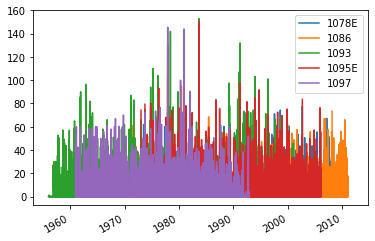

In [13]:
Input_Series.plot()

### Plotting rainfall series, seasonality and gauge position

Text(0, 0.5, 'mm/month')

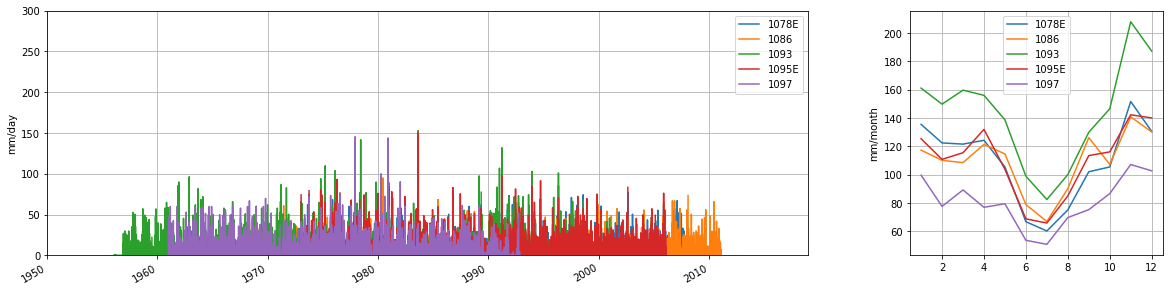

In [14]:
f, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [3, 1]}, figsize=(20, 5))

t1=str(Input_Series.index.year[0]); t2=str(Input_Series.index.year[-1])
Input_Series.plot(xlim=(t1, t2),  ylim=(0, 300), ax = ax0)
ax0.grid(True)
ax0.set_ylabel('mm/day')

grouped_m = Input_Series.groupby(lambda x: x.month)
Month_sum=grouped_m.sum()*24/(len(Input_Series>=0)/30)
Month_sum.plot(ax = ax1)
ax1.grid(True)
ax1.set_ylabel('mm/month')

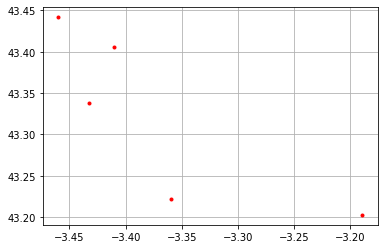

In [15]:
plt.plot(Input_Attr.X, Input_Attr.Y, '.r')
plt.grid()

### Calibration

Compleate...

In [16]:
# Reading hiperparamteres for the calibration
hiper_params_cal = Calhps('./Input_Cal_Ason.yml')

In [17]:
# Input statistics calculated from several Rainfall series
statistics_model_1 = Statistics(hiper_params_cal, time_series = Input_Series, attributes = Input_Attr)

# Input statistics from file 
#statistics_model_2 = Statistics(hiper_params_cal, file = 'auxiliary-materials/statististics_Bilbao.csv')

In [18]:
CAL              = Calibration(hiper_params_cal) 
CAL1             = CAL(statistics_model_1, Input_Series, verbose=True)
CAL1.save_files('./CAL3/')#save python objects

[20, 5000]


################################################################################
Adjustment of parameters using the Particle Swarm Optimization (PSO)



Fitting the months = (1, 2, 3)

Initialization number  = 0
Initial best position  2.9810205216963768 [1.69758949e-01 3.59422138e+01 1.07489210e+04 1.04522257e+00
 4.82771585e-01]
Iteration number  = 0
Total error = 2.9810205216963768
Iteration number  = 1
Total error = 2.9810205216963768
Iteration number  = 2
Total error = 2.044101620773139
Iteration number  = 3
Total error = 2.044101620773139
Iteration number  = 4
Total error = 2.044101620773139
Iteration number  = 5
Total error = 2.044101620773139
Iteration number  = 6
Total error = 2.044101620773139
Iteration number  = 7
Total error = 1.1737288593130735
Iteration number  = 8
Total error = 1.1737288593130735
Iteration number  = 9
Total error = 0.9951554375058657
Iteration number  = 10
Total error = 0.9951554375058657
Iteration number  = 11
Total error = 0.585581916996561

In [19]:
# Reading hiperparamteres for the simulation
hiper_params_sim = Simhps('./Input_Sim_Ason.yml')

In [20]:
SIM              = Simulation(hiper_params_sim) 
# Input parameters from the model

# SIM1             = SIM(params_cal = CAL1, Input_Series = Input_Series, Input_Attr = Input_Attr)

SIM1             = SIM(params_cal =['./CAL3/Calibrated_parameters.csv',
                                    './CAL3/xi_months.csv'], 
                       Input_Series = Input_Series, Input_Attr = Input_Attr)



################################################################################
Synthetic simulation


[-3.8128147643014803, 42.85028523569852]
[-2.83688523569852, 42.85028523569852]
[-2.83688523569852, 43.79421476430148]
[-3.8128147643014803, 43.79421476430148]
79.55812410952936
104.96031966780697
8350.446138707262
[0.0170766  0.0170766  0.0170766  0.01055725 0.01055725 0.01055725
 0.0129418  0.0129418  0.0129418  0.02341632 0.02341632 0.02341632] Celdas por km² y por tormenta
[142.59720145 142.59720145 142.59720145  88.15772825  88.15772825
  88.15772825 108.06977808 108.06977808 108.06977808 195.53671789
 195.53671789 195.53671789] Celdas por tormenta en mi area de simulacion
Storm ini = [6.46637532 6.46637532 6.46637532 6.07051769 6.07051769 6.07051769
 8.85148514 8.85148514 8.85148514 8.3686648  8.3686648  8.3686648 ]
Numero de tormentas 444 para los meses [1]
Numero de celdas de lluvia por tormenta 143.8063063063063


100%|████████████████████████████████████████████████████████████████████████████████| 444/444 [00:35<00:00, 12.42it/s]


Numero de tormentas 429 para los meses [2]
Numero de celdas de lluvia por tormenta 144.020979020979


100%|████████████████████████████████████████████████████████████████████████████████| 429/429 [00:34<00:00, 12.40it/s]


Numero de tormentas 443 para los meses [3]
Numero de celdas de lluvia por tormenta 144.32279909706546


100%|████████████████████████████████████████████████████████████████████████████████| 443/443 [00:37<00:00, 11.88it/s]


Numero de tormentas 445 para los meses [4]
Numero de celdas de lluvia por tormenta 90.21123595505618


100%|████████████████████████████████████████████████████████████████████████████████| 445/445 [00:23<00:00, 19.13it/s]


In [21]:
SIM1.save_files('./SIM3/')

In [22]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 1049.2213971614838 seconds ---


In [23]:
from haversine import haversine

In [24]:
lat1 = Attributes_SN.Latitud.values[0]
lat2 = Attributes_SN.Latitud.values[1]

lon1 = Attributes_SN.Longitud.values[0]
lon2 = Attributes_SN.Longitud.values[1]

In [25]:
from pyproj import Proj, transform
outProj = Proj(init='epsg:25830')
inProj = Proj(init='epsg:4326')
x2,y2 = transform(inProj,outProj,Attributes_SN.Longitud.values,Attributes_SN.Latitud.values)

In [26]:
haversine((lon1,lat1),(lon2,lat2))

33.31927302757044

In [27]:
np.sqrt((x2[1]-x2[0])**2+(y2[1]-y2[0])**2)/1000

28.77898083466557

In [28]:
np.sqrt((lon1-lon2)**2+(lat1-lat2)**2)*111

33.28605733111059

In [29]:
CAL1.crosscorr_Real

{'crosscorr_1': {(1,
   2,
   3):         dist  cross_corr
  0   1.721856    0.938508
  1   5.165567    0.853340
  2   8.609279    0.797564
  3  12.052990    0.761036
  4  15.496701    0.737114
  5  18.940413    0.721448
  6  22.384124    0.711188
  7  25.827836    0.704469
  8  29.271547    0.700068
  9  32.715258    0.697187,
  (4,
   5,
   6):         dist  cross_corr
  0   1.721856    0.912810
  1   5.165567    0.808223
  2   8.609279    0.743114
  3  12.052990    0.702581
  4  15.496701    0.677349
  5  18.940413    0.661640
  6  22.384124    0.651861
  7  25.827836    0.645774
  8  29.271547    0.641984
  9  32.715258    0.639624,
  (7,
   8,
   9):         dist  cross_corr
  0   1.721856    0.943652
  1   5.165567    0.859242
  2   8.609279    0.798235
  3  12.052990    0.754143
  4  15.496701    0.722276
  5  18.940413    0.699244
  6  22.384124    0.682598
  7  25.827836    0.670567
  8  29.271547    0.661872
  9  32.715258    0.655588,
  (10,
   11,
   12):         dist  cros